# Gerando Dados p/ Exemplo bidimensional simples

$y = x + 2 + \eta$

In [21]:
import numpy as np

X = np.arange(-5, 5, 0.05)

nb_samples = len(X)

Y = X + 2
Y += np.random.normal(0.0, 10.5, size=nb_samples)

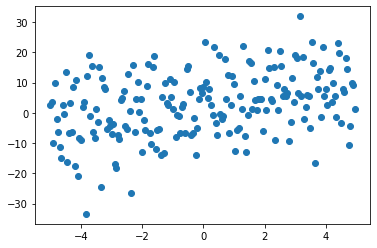

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()

### Função de Perda

$ 𝐿=\frac{1}{2} \sum_{𝑖=1}^m (\alpha + \beta x_i + y_i)^2$


### Gradiente
$\Biggl\{
\begin{array}{ll}
 \frac{\delta L}{\delta \alpha} \sum_{𝑖=1}^n (\alpha + \beta x_i - y_i) = 0\\ 
 \frac{\delta L}{\delta \beta} \sum_{𝑖=1}^n (\alpha + \beta x_i - y_i)x_i = 0
\end{array}$



In [23]:
def loss(v):
   e = 0.0
   for i in range(nb_samples):
      e += np.square(v[0] + v[1]*X[i] - Y[i])
   return 0.5 * e


def gradient(v):
   g = np.zeros(shape=2)
   for i in range(nb_samples):
      g[0] += (v[0] + v[1]*X[i] - Y[i])
      g[1] += ((v[0] + v[1]*X[i] - Y[i]) * X[i])
   return g

### Minimizar

In [24]:
from scipy.optimize import minimize
res = minimize(fun=loss, x0=[0.0, 0.0], jac=gradient, method='L-BFGS-B')
res

      fun: 9927.145309422773
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00294054, -0.0003704 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 8
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([2.88644306, 1.30776228])

In [25]:
def predictY(X, alpha, beta):
    Ym = []
    for i in range(len(X)):
        Ym.append(beta * X[i] + alpha)
    return Ym

In [26]:
Ym = predictY(X, res.x[0], res.x[1])

from sklearn.metrics import r2_score
r2 = r2_score(Y,Ym)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.12553976603937245


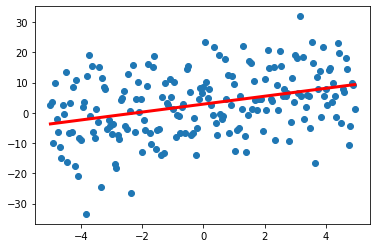

In [27]:
import matplotlib.pyplot as plt

alpha =  res.x[0]
beta = res.x[1]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

## Método Matricial

In [159]:
Xs = np.expand_dims(X, axis=1)
Ys = np.expand_dims(Y, axis=1)
Xs = np.concatenate((Xs, np.ones_like(Xs)), axis=1)

result = np.linalg.inv(np.dot(Xs.T, Xs)).dot(Xs.T).dot(Y)
print(result[1], result[0])
print('y = %2.f + %.2fx' % (result[1], result[0]))


2.001064981038512 0.9822057836236007
y =  2 + 0.98x


In [160]:
result

array([0.98220578, 2.00106498])

In [161]:
Ym = predictY(X, result[1], result[0])

from sklearn.metrics import r2_score
r2 = r2_score(Y,Ym)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9696432421271788


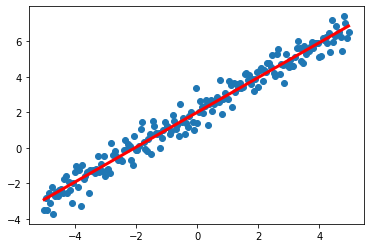

In [162]:
import matplotlib.pyplot as plt

alpha = result[1]
beta = result[0]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

## Exemplo de Regressão

In [28]:
import pandas as pd  # doctest: +SKIP
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston={}
boston["data"] = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston["target"] = raw_df.values[1::2, 2]

In [31]:
print(boston["data"].shape)

print(boston["target"].shape)


(506, 13)
(506,)


In [126]:
def norma_l2(X):
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(boston["data"], boston["target"], test_size=0.3)

lr = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
reg = lr.fit(X_train, Y_train)


In [45]:
print(reg['linearregression'].coef_)
print(reg['linearregression'].intercept_)
print(reg.score(X_test, Y_test))


[-9.22660656e-01  9.79560844e-01 -1.57338429e-03  6.38484779e-01
 -1.94980447e+00  2.47431674e+00 -6.89016269e-02 -3.23778543e+00
  2.91093042e+00 -1.88951199e+00 -2.10703192e+00  1.08632575e+00
 -3.74673893e+00]
38.5524132209822
0.7866925596774145


In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, boston["data"], boston["target"], cv=7, scoring='neg_mean_squared_error')
scores

array([ -11.30795492,  -10.94743251,  -32.12487323,  -33.57836799,
        -10.54825524, -149.57087382,  -12.93285837])

In [47]:
print(scores.mean())
print(scores.std())


-37.28723086835311
46.78955638801999


In [64]:
scores = cross_val_score(lr, boston["data"], boston["target"], cv=6, scoring='r2')
scores

array([ 0.64286835,  0.6124552 ,  0.51498797,  0.78529513, -0.14696285,
       -0.00747687])

In [65]:
print(scores.mean())
print(scores.std())


0.4001944881138499
0.3490468795601584


## Variância Explicada

$EV = 1-\frac{Var[Y-\tilde{Y}]}{Var[Y]}$

In [16]:
print(cross_val_score(lr, boston["data"], boston["target"], cv=10, scoring='explained_variance').mean())

0.27263956979413884


## Ridge Regression

In [61]:
from sklearn.linear_model import Ridge

lr = LinearRegression()
rg = Ridge(0.05)

lr_scores = cross_val_score(lr,  norma_l2(boston["data"]), boston["target"], cv=10)
print(lr_scores.mean())


rg_scores = cross_val_score(rg,  norma_l2(boston["data"]), boston["target"], cv=10)
print(rg_scores.mean())

0.20252899006056593
0.29806328292521655


In [63]:
from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(boston["data"]), boston["target"])

print(rg.alpha_)

0.01


## Lasso Regression

In [76]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)

ls_scores = cross_val_score(ls, norma_l2(boston["data"]), boston["target"], cv=10)

print(ls_scores.mean())


0.26553989145732915


In [77]:
from sklearn.linear_model import LassoCV

rs = LassoCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rs.fit(norma_l2(boston["data"]), boston["target"])

print(rs.alpha_)

0.005


## ElasticNet Regression

In [82]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(boston["data"]), boston["target"], cv=10)

print(en_scores.mean())

0.35447309380549197


In [83]:
encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(boston["data"]), boston["target"])

print(encv.alpha_)
print(encv.l1_ratio_)


0.001
0.5


## RANSAC

In [119]:
import numpy as np

X1 = np.arange(-5, 2.5, 0.05)

X2 = np.arange(2.5, 5, 0.05)

X = np.concatenate((X1, X2))

Y1 = X1 + 2
Y1 += np.random.normal(0.0, 0.5, size=len(X1))

Y2 = X2 + 10
Y2 += np.random.normal(0.0, 1, size=len(X2))

Y = np.concatenate((Y1, Y2))

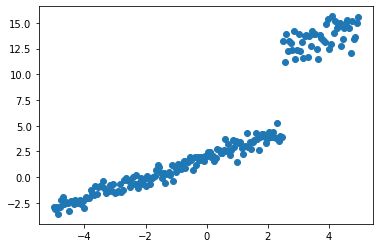

In [121]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()

In [146]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))

print(lr.intercept_)

print(lr.coef_)


[3.93623878]
[[1.88436868]]


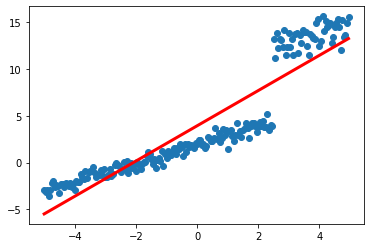

In [149]:
import matplotlib.pyplot as plt

alpha =  lr.intercept_[0]
beta = lr.coef_[0][0]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

In [136]:
from sklearn.linear_model import RANSACRegressor

rs = RANSACRegressor(lr)
rs.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))

print(rs.estimator_.intercept_)
print(rs.estimator_.coef_)


[1.92086819]
[[0.98923544]]


## Huber Regression

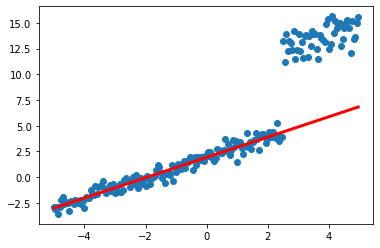

In [144]:
import matplotlib.pyplot as plt

alpha =  rs.estimator_.intercept_[0]
beta = rs.estimator_.coef_[0][0]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

In [186]:
import numpy as np
from random import random, randint

X = np.arange(-5, 5, 0.05)

Y = X + 2

Y += np.random.normal(0.0, 0.5, size=len(X))

for i in range(0,len(Y)):
    if random() > 0.7:
        Y[i] += randint(0,10)
    




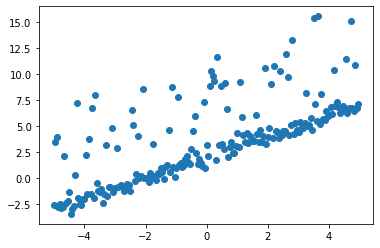

In [187]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()

In [192]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))

print(lr.intercept_)

print(lr.coef_)


[3.47103818]
[[0.98154113]]


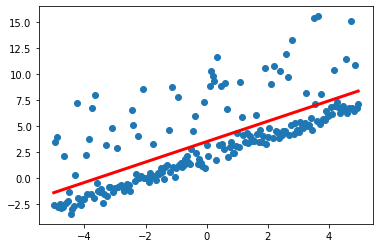

In [193]:
import matplotlib.pyplot as plt

alpha =  lr.intercept_[0]
beta = lr.coef_[0][0]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

In [194]:
from sklearn.linear_model import HuberRegressor

hr = HuberRegressor(epsilon=1.25)
hr.fit(X.reshape(-1, 1), Y)

print(hr.intercept_)
print(hr.coef_)


2.2577984371212283
[0.99938317]


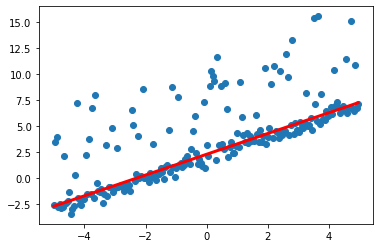

In [195]:
import matplotlib.pyplot as plt

alpha =  hr.intercept_
beta = hr.coef_[0]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

## Polinomial Regression

In [304]:
import numpy as np

X = np.arange(-5, 5, 0.05)

nb_samples = len(X)

Y = X**2 + 2
Y += np.random.normal(0.0, 0.5, size=nb_samples)

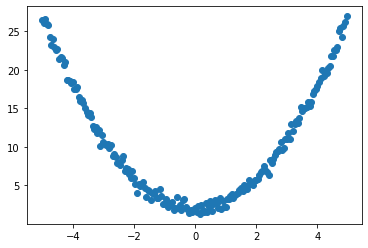

In [305]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()

In [306]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))

print(lr.score(X.reshape((-1, 1)), Y.reshape((-1, 1))))

print(lr.intercept_)
print(lr.coef_)

0.0003862829935938894
[10.31653219]
[[-0.05099142]]


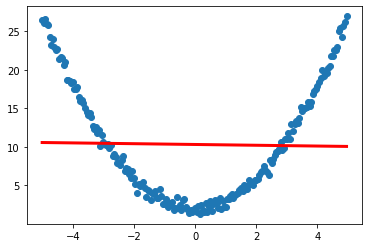

In [308]:
import matplotlib.pyplot as plt

alpha =  lr.intercept_
beta = lr.coef_[0]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

In [309]:
def predictYpolinomial(X, alpha, beta):
    Ym = []
    print(len(beta))
    for i in range(len(X)):
        y = alpha
        for c in range(1, len(beta)):
            y += beta[c] * (X[i]**c)
        Ym.append(y)
    
    return Ym

In [310]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
Xp = pf.fit_transform(X.reshape(-1, 1))

lr.fit(Xp, Y.reshape((-1, 1)))

print(lr.score(Xp, Y.reshape((-1, 1))))
print(lr.intercept_)
print(lr.coef_)

0.9952589283720149
[1.96491265]
[[ 0.00000000e+00 -8.76688592e-04  1.00229457e+00]]


3


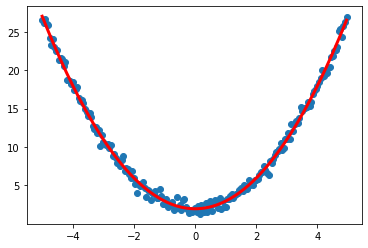

In [311]:
import matplotlib.pyplot as plt

alpha =  lr.intercept_[0]

Ym = predictYpolinomial(X, alpha, lr.coef_[0])

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

### Grau 3

In [312]:
import numpy as np

X = np.arange(-5, 5, 0.05)

nb_samples = len(X)

Y = 2*(X**3) + 0.5*(X**2) + X + 2
Y += np.random.normal(0.0, 0.5, size=nb_samples)

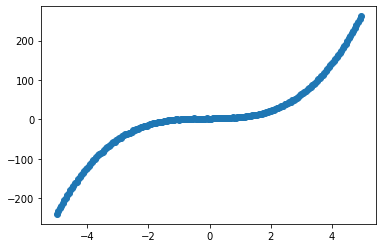

In [313]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.show()

In [314]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))

print(lr.score(X.reshape((-1, 1)), Y.reshape((-1, 1))))

print(lr.intercept_)
print(lr.coef_)

0.8474369483320915
[5.6535421]
[[30.96417615]]


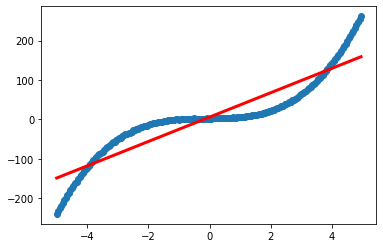

In [316]:
import matplotlib.pyplot as plt

alpha =  lr.intercept_
beta = lr.coef_[0]

Ym = predictY(X, alpha, beta)

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

In [317]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
Xp = pf.fit_transform(X.reshape(-1, 1))

lr.fit(Xp, Y.reshape((-1, 1)))

print(lr.score(Xp, Y.reshape((-1, 1))))
print(lr.intercept_)
print(lr.coef_)

0.9999759720578412
[2.03105965]
[[0.         0.95050121 0.49481419 2.00242755]]


4


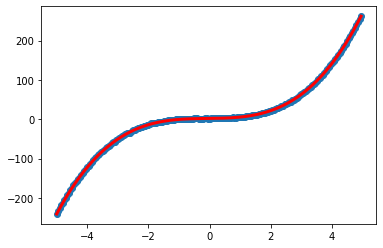

In [318]:
import matplotlib.pyplot as plt

alpha =  lr.intercept_[0]

Ym = predictYpolinomial(X, alpha, lr.coef_[0])

plt.scatter(X, Y)
plt.plot(X, Ym, color="red", linewidth=3)
plt.show()

### e a base boston housing?

In [327]:
from sklearn.feature_selection import SelectFromModel

pf = PolynomialFeatures(degree=2)
Xp = pf.fit_transform(boston["data"])

print(Xp.shape)

lr = LinearRegression()
lr.fit(Xp, boston["target"])
print(lr.score(Xp, boston["target"]))

(506, 105)
0.9239966561367284


In [328]:
sm = SelectFromModel(lr, threshold=10)
Xt = sm.fit_transform(Xp, boston["target"])

print(sm.estimator_.score(Xp, boston["target"]))
print(Xt.shape)


0.9239966561367284
(506, 9)


In [329]:
Xo = sm.inverse_transform(Xt)
print(Xo.shape)


(506, 105)


## Modelo Não-Linear


In [343]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

X = np.linspace(0, 4, 50)
Y = func(X, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

Y_noise = 0.2 * rng.normal(size=X.size)

Y = Y + Y_noise

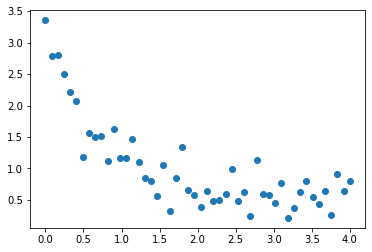

In [349]:
popt, pcov = curve_fit(func, xdata, ydata)

plt.scatter(X, Y)
plt.show()

[2.6913083  1.56856385 0.57213197]
[[ 0.02543451  0.01281616 -0.00084001]
 [ 0.01281616  0.03432656  0.00693842]
 [-0.00084001  0.00693842  0.00323043]]


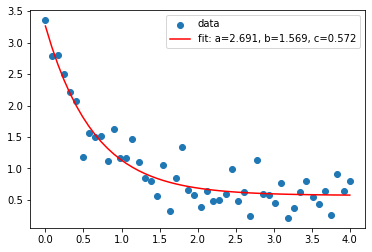

In [356]:
popt, pcov = curve_fit(func, X, Y)
print(popt)
print(pcov)

plt.scatter(X, Y,  label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

[2.46997853 1.         0.39969942]
[[ 0.02346768  0.0044277  -0.00344592]
 [ 0.0044277   0.02518717  0.01277211]
 [-0.00344592  0.01277211  0.00948823]]


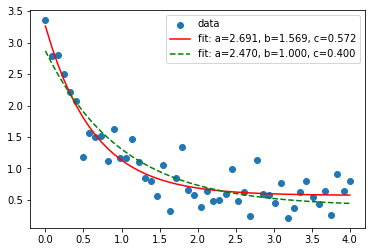

In [358]:
popt2, pcov2 = curve_fit(func, X, Y, bounds=(0, [3., 1., 0.5]))
print(popt2)
print(pcov2)

plt.scatter(X, Y,  label='data')
plt.plot(xdata, func(X, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(X, *popt2), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
plt.legend()
plt.show()